# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Advertising.csv')
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
y = dataset['Sales']
X = dataset.drop('Sales', axis=1)

In [4]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [6]:
import statsmodels.api as sm
mod = sm.OLS(y_train, X_train)
res = mod.fit()

In [7]:
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              3191.
Date:                Mon, 03 May 2021   Prob (F-statistic):                   2.03e-140
Time:                        20:16:32   Log-Likelihood:                         -331.22
No. Observations:                 160   AIC:                                      668.4
Df Residuals:                     157   BIC:                                      677.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Predicting the Test set results

In [8]:
y_pred = res.predict(X_test)
np.set_printoptions(precision=2)

In [9]:
y_pred

18      8.670253
170     5.587404
107     5.154165
98     25.823490
177    11.272618
182     4.694889
5      12.858037
146    14.484033
12     10.319431
152    16.040200
61     24.465821
125     7.698379
180     8.979572
154    14.947343
80     10.547342
7      11.060403
33     18.670879
130     9.371097
37     16.058395
74     17.161365
183    26.155409
145     7.966232
45     14.901963
159    11.700233
60      3.578620
123    14.715173
179    11.302884
185    21.577401
122    12.588001
44      7.893414
16     13.643148
55     22.805044
150    18.546352
111    21.910117
22      5.070448
189     4.120386
129     6.522450
4      12.845139
83     14.448479
106     4.282325
dtype: float64

In [10]:
list(y_test)

[11.3,
 8.4,
 8.7,
 25.4,
 11.7,
 8.7,
 7.2,
 13.2,
 9.2,
 16.6,
 24.2,
 10.6,
 10.5,
 15.6,
 11.8,
 13.2,
 17.4,
 1.6,
 14.7,
 17.0,
 26.2,
 10.3,
 14.9,
 12.9,
 8.1,
 15.2,
 12.6,
 22.6,
 11.6,
 8.5,
 12.5,
 23.7,
 16.1,
 21.8,
 5.6,
 6.7,
 9.7,
 12.9,
 13.6,
 7.2]

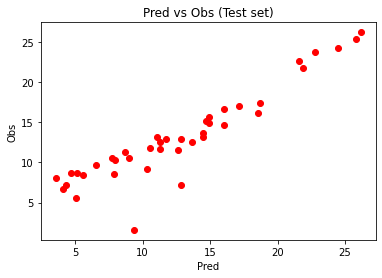

In [13]:
plt.scatter(y_pred, y_test, color = 'red')

plt.title('Pred vs Obs (Test set)')
plt.xlabel('Pred')
plt.ylabel('Obs')
plt.show()

In [12]:
np.corrcoef(y_pred, y_test)

array([[1.  , 0.93],
       [0.93, 1.  ]])

In [27]:
y_test[1:10]

170     8.4
107     8.7
98     25.4
177    11.7
182     8.7
5       7.2
146    13.2
12      9.2
152    16.6
Name: Sales, dtype: float64

In [23]:
ecm = ((y_pred-y_test)**2).mean()

In [25]:
ecm**0.5

2.378507420225156

In [28]:
X1 = X.drop('Newspaper', axis=1)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 0)

In [30]:
import statsmodels.api as sm
mod = sm.OLS(y_train, X_train)
res = mod.fit()

In [31]:
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              4711.
Date:                Mon, 03 May 2021   Prob (F-statistic):                   1.47e-141
Time:                        20:31:35   Log-Likelihood:                         -332.97
No. Observations:                 160   AIC:                                      669.9
Df Residuals:                     158   BIC:                                      676.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [32]:
y_pred = res.predict(X_test)
np.set_printoptions(precision=2)

In [33]:
ecm = ((y_pred-y_test)**2).mean()
ecm**0.5

2.4348232885700742